# Shai Assignment

**1. Basic Data Exploration :** Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')

In [3]:
# data types
data_types = df.dtypes
data_types

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [4]:
rows=df.shape[0]
cols=df.shape[1]
print(f'There are {rows} rows, and {cols} columns.')

There are 148654 rows, and 13 columns.


In [5]:
# null values in the data set
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**2. Descriptive Statistics:** Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [6]:
print('mean salary: ',df['TotalPay'].mean())
print('median salary: ',df['TotalPay'].median())
print('mode: ',df['TotalPay'].mode())
print('min salary: ',df['TotalPay'].min())
print('max salary: ',df['TotalPay'].max())
print('range salary: ',df['TotalPay'].max() - df['TotalPay'].min())
print('standard deviation of salaries: ', df['TotalPay'].std())

mean salary:  74768.32197169267
median salary:  71426.60999999999
mode:  0    0.0
Name: TotalPay, dtype: float64
min salary:  -618.13
max salary:  567595.43
range salary:  568213.56
standard deviation of salaries:  50517.00527394987


3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

In [7]:
empty_cols=df.isna().all()
empty_cols

Id                  False
EmployeeName        False
JobTitle            False
BasePay             False
OvertimePay         False
OtherPay            False
Benefits            False
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

notice that "Notes" and "Status" doesn't have any value and all the rows is null So I'm gonna drop them

In [8]:
df.drop(columns=['Notes'], inplace=True)
df.drop(columns=['Status'], inplace=True)

In [9]:
df.loc[df['OvertimePay']<0.0,'OvertimePay']=0.0
df.loc[df['BasePay']<0.0,'BasePay']=0.0

In [10]:
df[df['Benefits']<0.0][['Benefits','TotalPayBenefits']]

,Benefits,TotalPayBenefits
110528,-2.73,-2.73
110529,-8.20,-8.20
110530,-33.89,-33.89
144099,-13.80,9977.97


I Think That Benifits and the total pay benefits shouldn't have negative values.
I think its a good idea to set it zero

In [11]:
fill_values = pd.DataFrame({
                "Benefits" : 0.0,
                "BasePay" : df["BasePay"].mean()}, index=df.index)
df= df.combine_first(fill_values)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Agency            148654 non-null  object 
 1   BasePay           148654 non-null  float64
 2   Benefits          148654 non-null  float64
 3   EmployeeName      148654 non-null  object 
 4   Id                148654 non-null  int64  
 5   JobTitle          148654 non-null  object 
 6   OtherPay          148650 non-null  float64
 7   OvertimePay       148650 non-null  float64
 8   TotalPay          148654 non-null  float64
 9   TotalPayBenefits  148654 non-null  float64
 10  Year              148654 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


Note that we don't have any missing values any more, and as a result of removing the empty records the number of rows decreased by 4, and the number of columns decreased by 2 due to dropping the empty columns.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

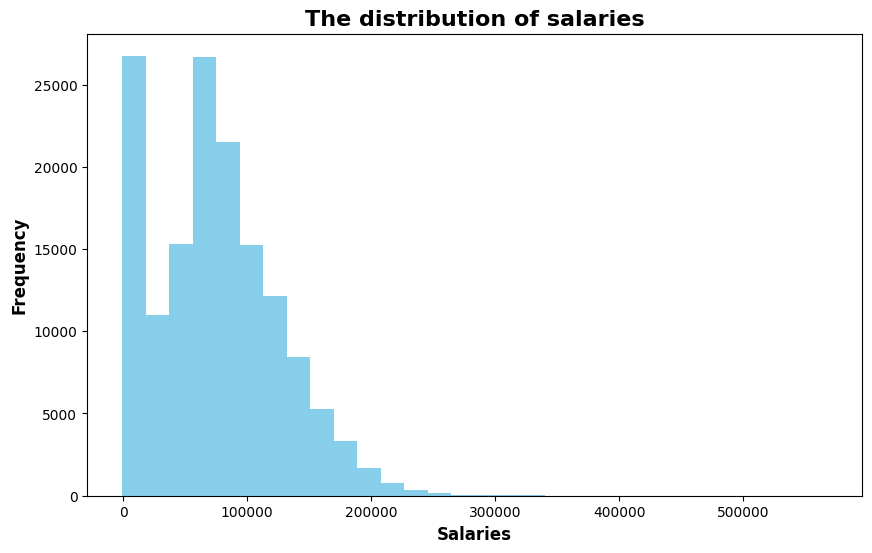

In [25]:
import matplotlib.pyplot as plt

salaries = df['TotalPay']

plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=30, color='skyblue')

plt.title('The distribution of salaries', fontsize=16, fontweight='bold')
plt.xlabel('Salaries', fontsize=12, color='black', fontweight='bold')
plt.ylabel('Frequency', fontsize=12, color='black', fontweight='bold')

# Show the plot
plt.show()


In [14]:
import pandas as pd

pattern = r"\((.*?)\)"

df['Department'] = df['JobTitle'].str.extract(pattern, expand=False)
df['Department'].fillna('Unknown', inplace=True)  # Replace missing values

unique_departments = df['Department'].unique()
print('The departments are:', unique_departments)


The departments are: ['Unknown' 'POLICE DEPARTMENT' 'FIRE DEPARTMENT' 'CIVIL & CRIMINAL'
 'CIVIL/CRIMINAL' 'MFCC' 'SEASONAL' 'Fire Dept' 'Cvl&Crmnl'
 'Civil & Criminal' 'SFERS' 'Police Department' 'Civil/Criminal'
 'Seasonal' 'Fire Department']


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4224\1489211982.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna('Unknown', inplace=True)  # Replace missing values


**NOTE:** The data contains some duplicate departments with different spellings or capitalizations. For example, (‘Cvl&Crmnl’ , ‘Civil/Criminal’, ‘CIVIL & CRIMINAL’ , ‘CIVIL/CRIMINAL’ , ‘Civil & Criminal’) all refer to the same department. To avoid confusion , we need to group these departments together under a single name.

In [15]:
replacements = {
    'Civil/Criminal': 'CIVIL & CRIMINAL',
    'Civil & Criminal': 'CIVIL & CRIMINAL',
    'Cvl&Crmnl': 'CIVIL & CRIMINAL',
    'CIVIL/CRIMINAL': 'CIVIL & CRIMINAL',
    'Police Department': 'POLICE DEPARTMENT',
    'Fire Department': 'FIRE DEPARTMENT',
    'Fire Dept': 'FIRE DEPARTMENT',
    'Seasonal': 'SEASONAL'
}

df['Department'] = df['Department'].replace(replacements)

In [16]:
proportion = df['Department'].value_counts(normalize=True).to_dict()
proportion

{'Unknown': 0.9825500827424758,
 'CIVIL & CRIMINAL': 0.01031926487010104,
 'POLICE DEPARTMENT': 0.004789645754571017,
 'SEASONAL': 0.0007803355442840422,
 'MFCC': 0.0006054327498755499,
 'FIRE DEPARTMENT': 0.0005247083832254766,
 'SFERS': 0.0004305299554670577}

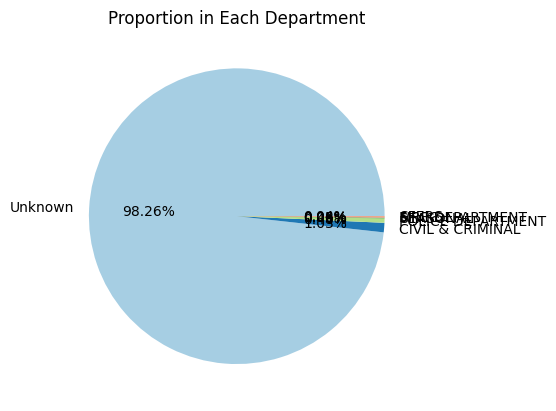

In [29]:

import matplotlib.pyplot as plt

labels = list(proportion.keys())
values = list(proportion.values())

plt.pie(values, labels=labels, autopct='%.2f%%', colors=plt.cm.Paired.colors)
plt.title('Proportion in Each Department')
plt.show()


5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [37]:

Year = df.groupby('Year')['TotalPay'].describe()
Year = df.groupby('Year')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'count'])
Year

,mean,median,min,max,count
Department,,,,,
CIVIL & CRIMINAL,136806.539283,150254.700,0.00,225366.50,1534
FIRE DEPARTMENT,236373.814872,242809.475,7093.37,333888.32,78
MFCC,67517.330222,79729.945,1122.70,97413.08,90
POLICE DEPARTMENT,158423.671517,152548.170,283.86,538909.28,712
SEASONAL,9382.643879,8380.800,293.40,20952.00,116
SFERS,87697.342344,84263.110,576.36,231739.64,64
Unknown,73673.398022,70715.150,-618.13,567595.43,146060


In [38]:
Department = df.groupby('Department')['TotalPay'].describe()
Department = df.groupby('Department')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'count'])
Department

,mean,median,min,max,count
Department,,,,,
CIVIL & CRIMINAL,136806.539283,150254.700,0.00,225366.50,1534
FIRE DEPARTMENT,236373.814872,242809.475,7093.37,333888.32,78
MFCC,67517.330222,79729.945,1122.70,97413.08,90
POLICE DEPARTMENT,158423.671517,152548.170,283.86,538909.28,712
SEASONAL,9382.643879,8380.800,293.40,20952.00,116
SFERS,87697.342344,84263.110,576.36,231739.64,64
Unknown,73673.398022,70715.150,-618.13,567595.43,146060


6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

In [20]:
df["Benefits"].corr(df["TotalPay"])

0.6322018839186374

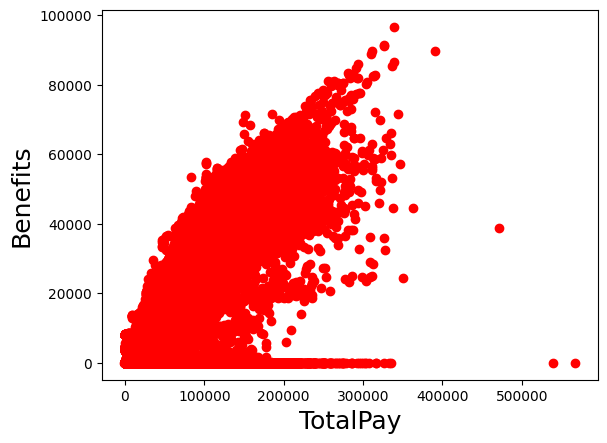

In [21]:
plt.scatter(df['TotalPay'],df['Benefits'],color = 'red')
plt.xlabel("TotalPay", color = 'black', size = 18)
plt.ylabel("Benefits", color = 'black', size = 18)
plt.show()

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

**Here are some insights**:

There is a **strong correlation** between BasePay and Benefits, and a **weak correlation** between TotalPay and Year.

The distribution of salary is $right-skewed$, meaning that most of the employees have lower salary than the average, and only a few have very high salary. The median TotalPay is **71426.61**, which is lower than the mean totalPay **74768.32**, indicating the skewness.

the highest mean of total pay in any year is at 2013 with a value of 77611.443142

A **negative value of OtherPay** seems unrealistic and suggests a data error. Alternatively, it could indicate that some employees were penalized for causing losses.

The only agency in the data is **San Francisco**, which means that the data is not diverse or comprehensive enough to compare with other agencies or locations

there is a good correlation between the base pay and the benefits